#Supermarket Dataset Analysis by Komala
Dataset source: https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls (Converted the Excel file to CSV)
## Business Questions on Supermarket Dataset
1.   Which Category is Best Selling and Most Profitable?
2.   What are the Best Selling and Most Profitable Sub-Category?
3.   Which is the Top Selling Sub-Category?
4.   Which Customer Segment is Most Profitable?
5.   Which is the Preferred Ship Mode?
6.   Which Region is the Most Profitable?
7.   Which City has the Highest Number of Sales?


## Who is Reading this Analysis?

  We assume that the Super Store is a family business and is owned by 1 or 2 owners who are very invested in their business.
  Owners are likely not people who are expert in reading charts or interpreting statistical analysis, so our analysis will be in layman terms and easy to understand.


In [ ]:
pip install  pandas

In [ ]:
# Import libraries and alias for easy reading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# Read in data in CSV format

# superstore = pd.read_excel('Sample_Superstore.xls', engine='openpyxl')
# superstore = pd.ExcelFile('Sample_Superstore.xls', engine='openpyxl')


In [ ]:
# Set the display format for floating-point numbers to avoid scientific notation
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df1 = pd.read_csv('Sample_Superstore.csv', encoding='ISO-8859-1')

### Dataset Contains 20 Attributes

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# df1.head(5)
# Display the first 5 rows of the dataframe
print(df1.head(5))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  12-06-2016  16-06-2016    Second Class    DV-13045   
3       4  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   
4       5  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

Deleting unwanted columns according to the Business Questions<br/>


    Which Category is Best Selling and Most Profitable?
    What are the Best Selling and Most Profitable Sub-Category?
    Which is the Top Selling Sub-Category?
    Which Customer Segment is Most Profitable?
    Which is the Preferred Ship Mode?
    Which Region is the Most Profitable?
    Which City has the Highest Number of Sales?



In [ ]:
# Find the no. of rows and columns
df1.shape

(9994, 21)

In [ ]:
df = df1.copy()

In [ ]:
df.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Product ID','Product Name'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.shape

(9994, 13)

# Data Cleaning

In [ ]:
# Find the number of null values for all columns
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [ ]:
# To see the Rows count with null values in any column
df.isnull().any(axis=0)

,0
Ship Mode,False
Segment,False
Country,False
City,False
State,False
Postal Code,False
Region,False
Category,False
Sub-Category,False
Sales,False


In [ ]:
# To see the Rows with null values
df.isnull().any()

,0
Ship Mode,False
Segment,False
Country,False
City,False
State,False
Postal Code,False
Region,False
Category,False
Sub-Category,False
Sales,False


## Deleting Duplicates

In [ ]:
df.duplicated().sum()


17

In [ ]:
# Viewing the Duplicated Rows
print(df[df.duplicated(keep=False)])

           Ship Mode      Segment        Country           City         State  \
568   Standard Class    Corporate  United States        Seattle    Washington   
591   Standard Class     Consumer  United States          Salem        Oregon   
935   Standard Class  Home Office  United States   Philadelphia  Pennsylvania   
950   Standard Class  Home Office  United States   Philadelphia  Pennsylvania   
1186  Standard Class    Corporate  United States        Seattle    Washington   
1479  Standard Class     Consumer  United States  San Francisco    California   
2803  Standard Class     Consumer  United States  San Francisco    California   
2807    Second Class     Consumer  United States        Seattle    Washington   
2836  Standard Class     Consumer  United States    Los Angeles    California   
3127  Standard Class     Consumer  United States  New York City      New York   
3405  Standard Class  Home Office  United States       Columbus          Ohio   
3406  Standard Class  Home O

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.shape)

(9977, 13)


#Calculated Field Now, we will create a calculated field for Profit Margin. The formula is (Profit / Sales) * 100.

In [ ]:
df['Profit Margin %'] = (df.Profit / df.Sales) * 100
print(df.head(5))

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  Profit Margin %  
0      0.00   41.9136            16.00  
1      0.0

In [ ]:
print(df.shape)

(9977, 14)


#Descriptive Statistics

In [ ]:
print(df.describe(include='all'))

             Ship Mode   Segment        Country           City       State  \
count             9977      9977           9977           9977        9977   
unique               4         3              1            531          49   
top     Standard Class  Consumer  United States  New York City  California   
freq              5955      5183           9977            914        1996   
mean               NaN       NaN            NaN            NaN         NaN   
std                NaN       NaN            NaN            NaN         NaN   
min                NaN       NaN            NaN            NaN         NaN   
25%                NaN       NaN            NaN            NaN         NaN   
50%                NaN       NaN            NaN            NaN         NaN   
75%                NaN       NaN            NaN            NaN         NaN   
max                NaN       NaN            NaN            NaN         NaN   

         Postal Code Region         Category Sub-Category      

In [ ]:
df2 = df.copy()
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  Profit Margin %  
0      0.00   41.9136            16.00  
1      0.0

## Using Label Encoder instead which is more suitable to this use case to encode the categorical variable than the Ordinal Encoding for Outlier Checking using BOXPLOT

In [ ]:
#Apply encoding to categorical variables such as Ship Mode, Segment, Country, City, State, Category, Sub-Category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_columns = ["Ship Mode","Segment","Country","City","State","Region","Category","Sub-Category"]
# le.fit(df2[df_columns ])
# df2[df_columns] = le.fit_transform(df2[df_columns])
# Apply LabelEncoder to each column separately
for column in df_columns:
    df2[column] = le.fit_transform(df2[column])

print(df2.head())

   Ship Mode  Segment  Country  City  State  Postal Code  Region  Category  \
0          2        0        0   194     15        42420       2         0   
1          2        0        0   194     15        42420       2         0   
2          2        1        0   266      3        90036       3         1   
3          3        0        0   153      8        33311       2         0   
4          3        0        0   153      8        33311       2         1   

   Sub-Category     Sales  Quantity  Discount    Profit  Profit Margin %  
0             4  261.9600         2      0.00   41.9136            16.00  
1             5  731.9400         3      0.00  219.5820            30.00  
2            10   14.6200         2      0.00    6.8714            47.00  
3            16  957.5775         5      0.45 -383.0310           -40.00  
4            14   22.3680         2      0.20    2.5164            11.25  


In [ ]:
# from sklearn import preprocessing
# enc = preprocessing.OrdinalEncoder()
# df_columns = ["Ship Mode","Segment","Country","City","State","Category","Sub-Category"]
# df2[df_columns] =  enc.fit_transform(df2[df_columns])
# print(df2.head())

In [ ]:
cols = df.columns
print(cols)
cols =df

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Profit Margin %'],
      dtype='object')


#Outlier Detection in the Dataset

###  Box plot for Selected numerical columns

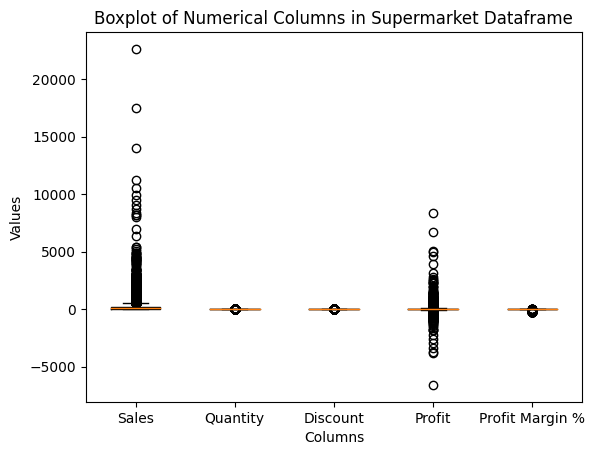

In [ ]:
import matplotlib.pyplot as plt

# Selecting only numerical columns for the boxplot
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin %']

# Creating the boxplot
plt.boxplot([df2[col] for col in numerical_columns])

# Setting x-axis labels
plt.xticks([i+1 for i in range(len(numerical_columns))], numerical_columns)

# Setting title, xlabel, and ylabel directly on fig1
plt.title("Boxplot of Numerical Columns in Supermarket Dataframe")
plt.xlabel('Columns')
plt.ylabel('Values')

# Showing the plot
plt.show()


### Box plot for ALL Variables

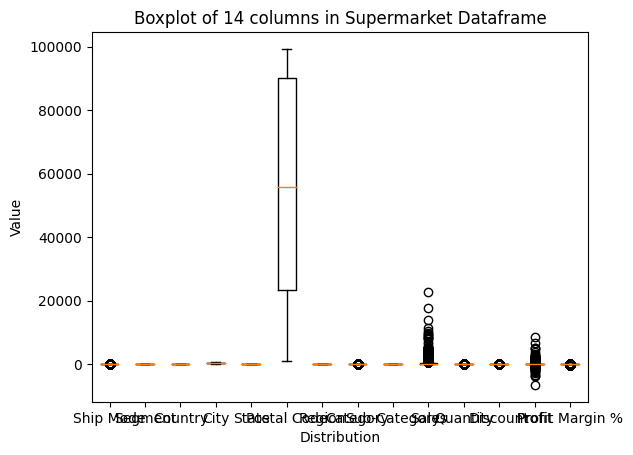

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(x=(df2['Ship Mode'], df2['Segment'], df2['Country'], df2['City'],df2['State'], df2['Postal Code'], df2['Region'], df2['Category'],
               df2['Sub-Category'], df2['Sales'], df2['Quantity'], df2['Discount'], df2['Profit'], df2['Profit Margin %']))
# Setting x-axis labels
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
        'Profit', 'Profit Margin %'])
# Setting title, xlabel, and ylabel directly on fig1
plt.title("Boxplot of 14 columns in Supermarket Dataframe")
plt.xlabel('Distribution')
plt.ylabel('Value')
plt.show()
# TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


# Univariate

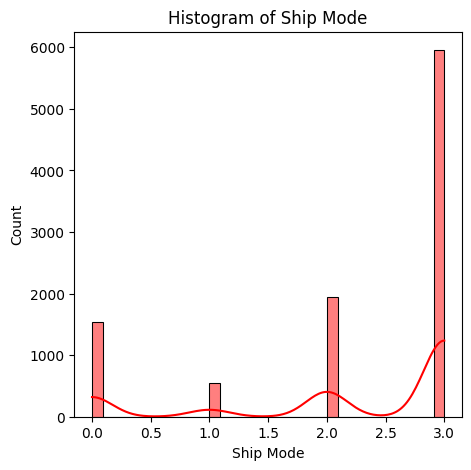

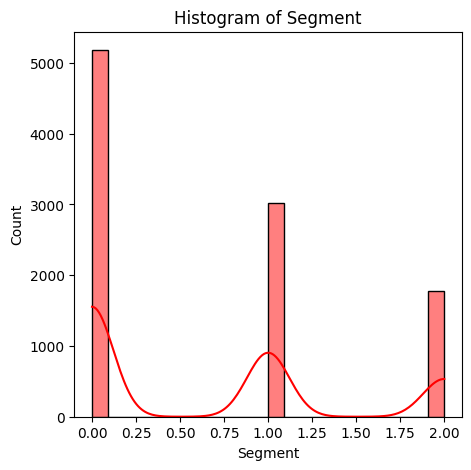

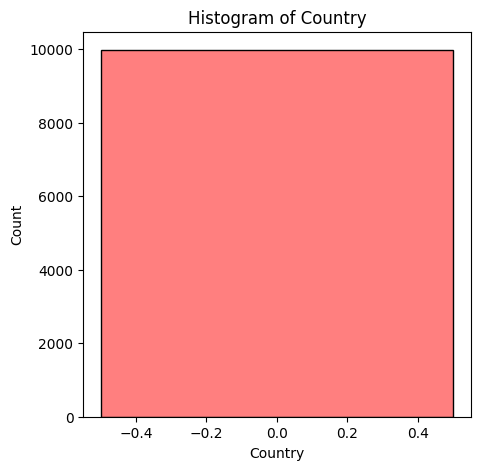

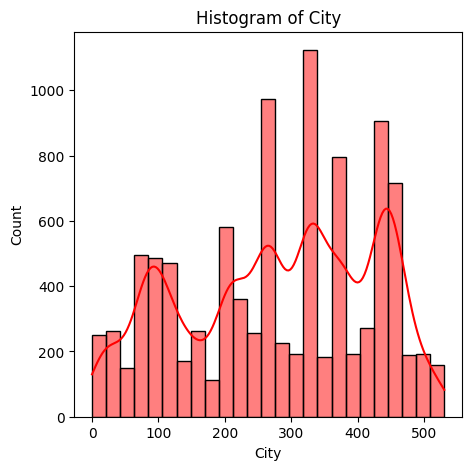

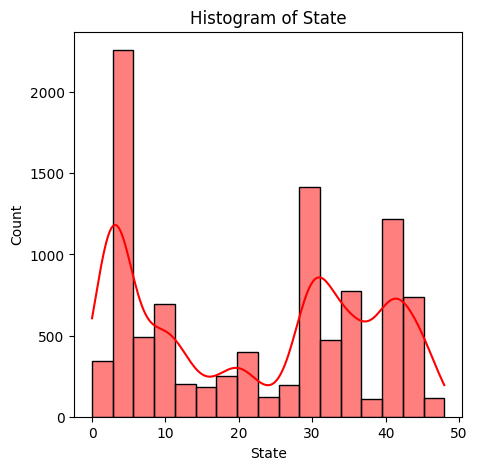

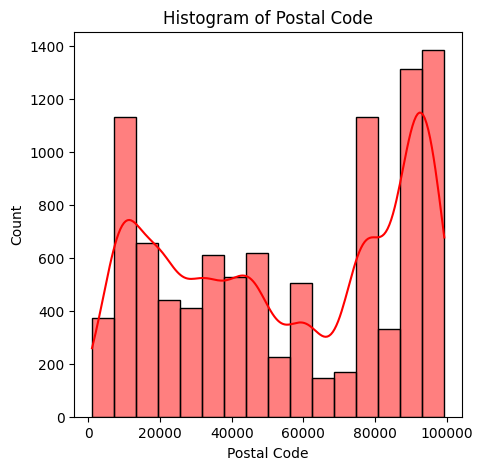

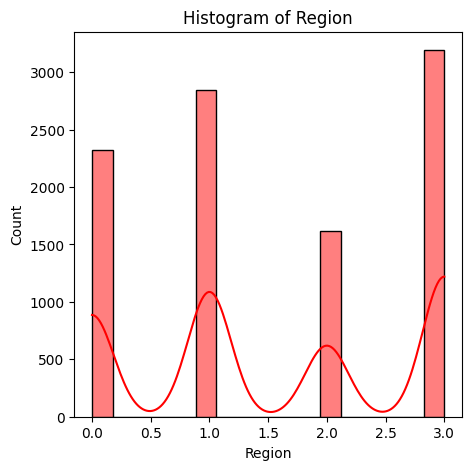

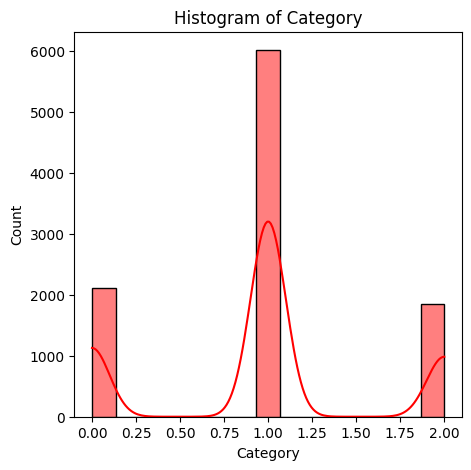

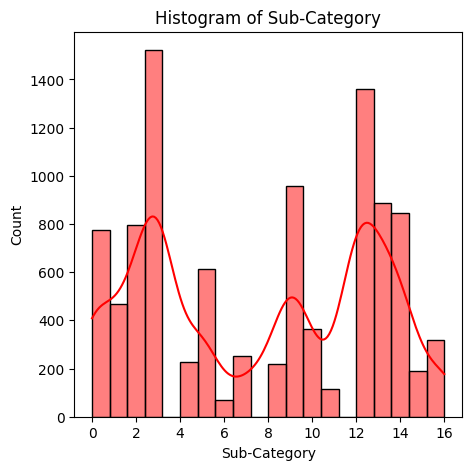

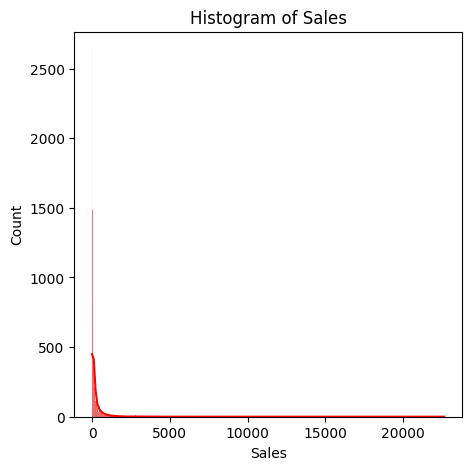

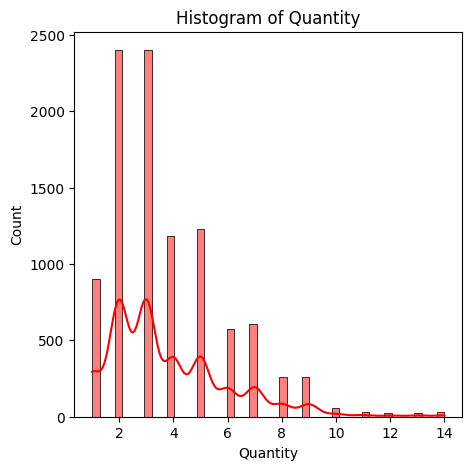

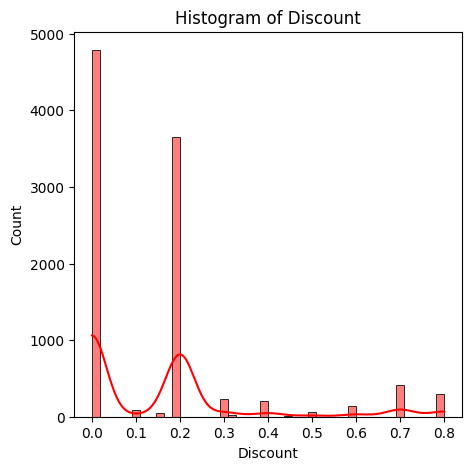

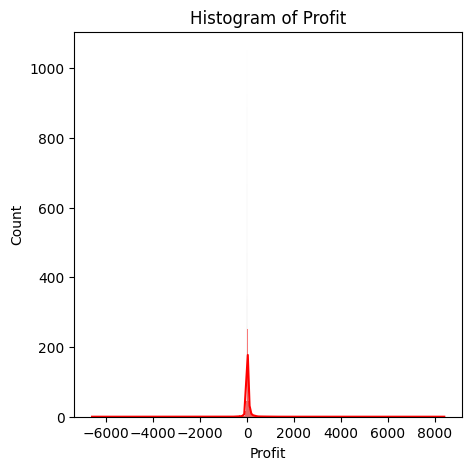

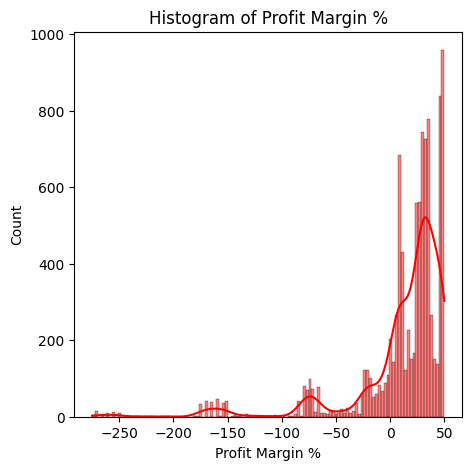

In [ ]:
df_columns = df.columns
for col in df_columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(df2[col], kde = True, color='r')
    plt.title('Histogram of ' + col)
    plt.show()

## Bivariate

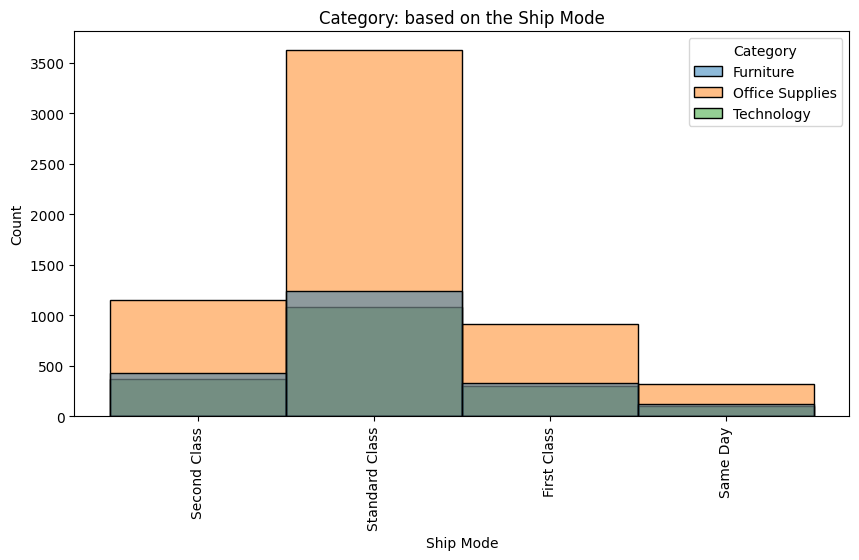

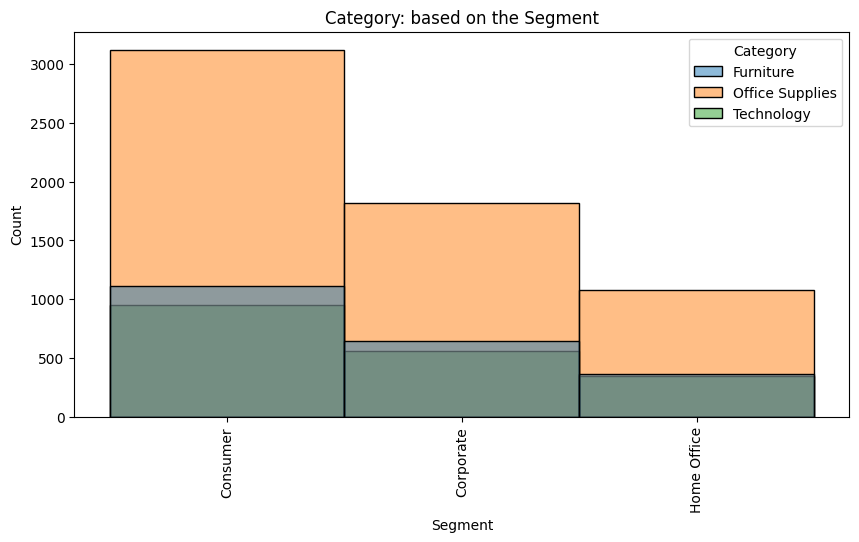

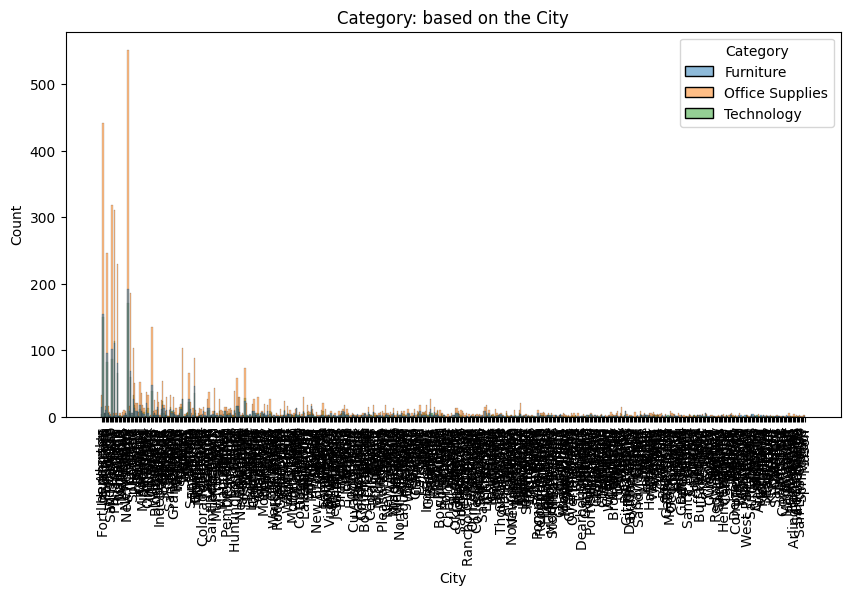

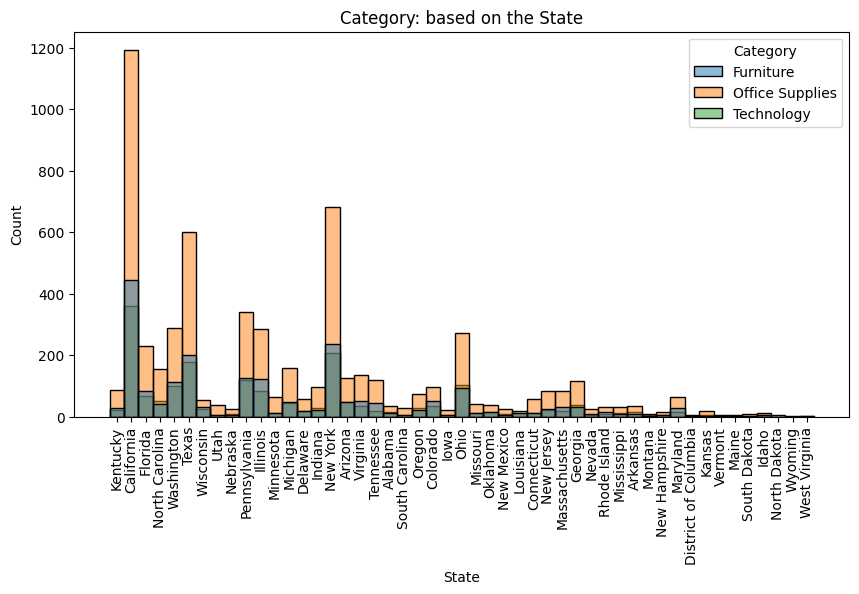

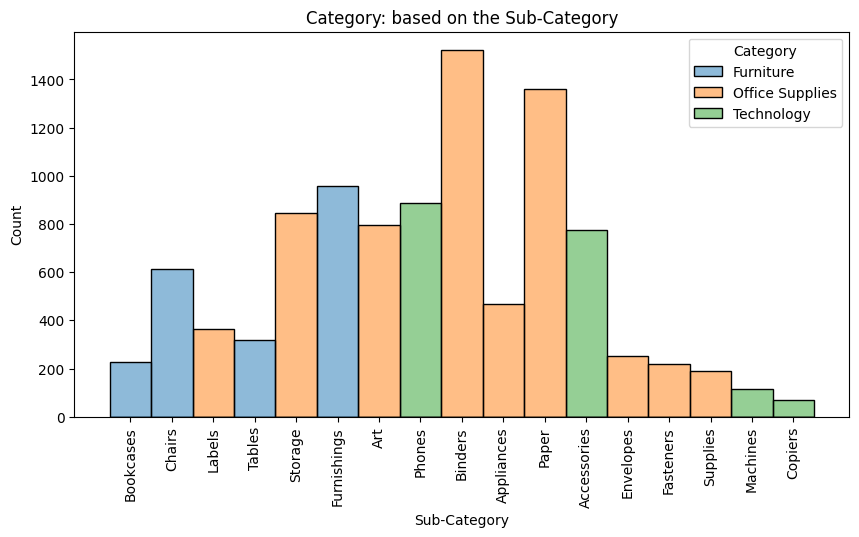

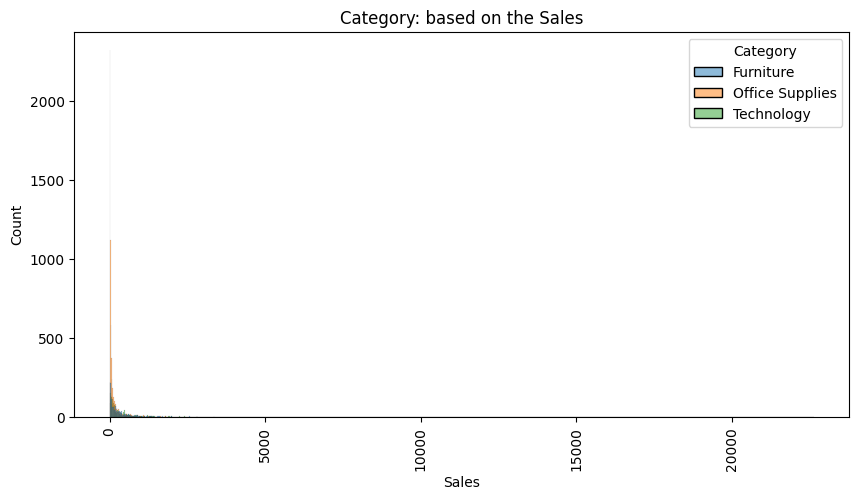

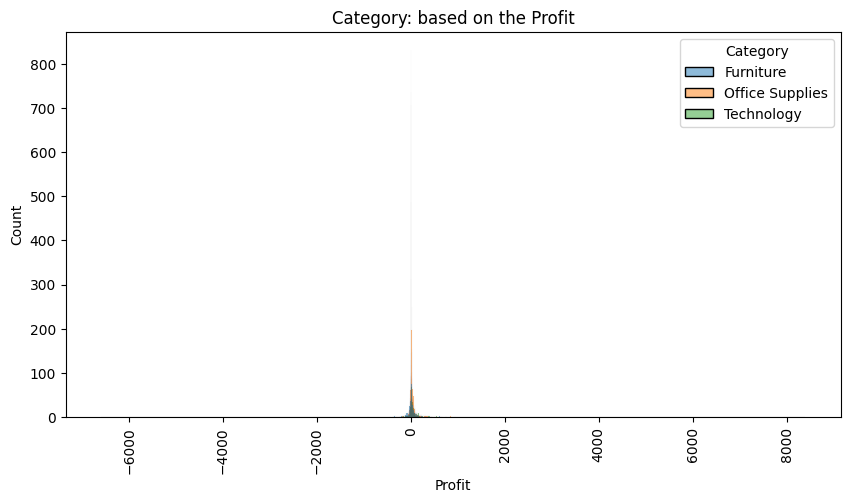

In [ ]:
#STEP2.4.2: Bivariate Data Exploration of selected features on the Category through histogram
# Exploring to uncover some important data Patterns of the Supermarket dataset based on the 13 features namely:
# 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code','Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
#        'Profit', 'Profit Margin %'
Selected_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Sub-Category','Sales','Profit']
for i in Selected_cols:
    plt.figure(figsize=(10,5))
    plt.title("Category: based on the "+ i)
    sns.histplot(x=i, hue="Category", data=df)
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.show()

# Using Encoded dataframe to evaluate Correlation test and the Heatmap visualization

## Correlation Test on Category Basis


In [ ]:
# Correlation Test on Category Basis
df2.corr()['Category'].sort_values(ascending=False).round(9)

,Category
Category,1.000000
Profit,0.091507
Profit Margin %,0.081517
Sales,0.040116
City,0.013530
Segment,0.010548
State,0.006595
Postal Code,-0.002262
Ship Mode,-0.003825
Quantity,-0.003839


The correlation test results provide insights into how different variables are related to the "Category" variable in your dataset. Here's a summary of the key findings:

    Profit (0.091507) and Profit Margin % (0.081517) have a weak positive correlation with the "Category". This suggests that there is a slight tendency for certain categories to be associated with higher profits and profit margins.

    Sales (0.040116) shows a very weak positive correlation with the "Category", indicating a minimal relationship between the sales amount and the category.

    City (0.013530), Segment (0.010548), and State (0.006595) have very weak positive correlations with the "Category". These correlations are nearly negligible, suggesting that the category is not strongly related to these geographical or customer segmentation variables.

    Postal Code (-0.002262), Ship Mode (-0.003825), Quantity (-0.003839), and Region (-0.005277) show very weak negative correlations with the "Category". These correlations are also nearly negligible, indicating that there is no meaningful relationship between the category and these variables.

    Discount (-0.063086) and Sub-Category (-0.075875) have weak negative correlations with the "Category". This implies that certain categories might be associated with lower discounts and specific sub-categories, but the relationships are still weak.

Overall, the correlations between "Category" and other variables in the dataset are very weak, indicating that "Category" is relatively independent of these variables. The strongest correlations are with "Profit" and "Profit Margin %", but even these are weak, suggesting that other factors might play a more significant role in determining category characteristics.

## Correlation Test on Region Basis


In [ ]:
# Correlation Test on Category Basis
df2.corr()['Region'].sort_values(ascending=False).round(9)

,Region
Region,1.000000
Postal Code,0.474290
City,0.281052
Profit Margin %,0.225571
Profit,0.022295
Quantity,0.013606
Sub-Category,0.008522
Sales,0.004508
Category,-0.005277
Segment,-0.005621


These correlation test results show how different variables are related to the "Region" variable in your dataset. Here's a summary of the key findings:

    Postal Code (0.474290) shows a moderate positive correlation with the "Region". This indicates that regions are moderately associated with specific postal codes, likely due to regional postal code groupings.

    City (0.281052) has a weak positive correlation with the "Region", suggesting some association between regions and cities, as cities are likely grouped within regions.

    Profit Margin % (0.225571) has a weak positive correlation with the "Region". This suggests that certain regions might have slightly higher profit margins.

    Profit (0.022295), Quantity (0.013606), Sub-Category (0.008522), and Sales (0.004508) all show very weak positive correlations with the "Region". These relationships are negligible, indicating that these variables are nearly independent of regions.

    Category (-0.005277) and Segment (-0.005621) have very weak negative correlations with the "Region". These correlations are also nearly negligible, suggesting minimal relationship between the category, segment, and region.

    Ship Mode (-0.024384) shows a very weak negative correlation with the "Region", indicating almost no relationship between the region and the shipping mode used.

    Discount (-0.211995) has a weak negative correlation with the "Region". This implies that certain regions might be associated with lower discounts.

    State (-0.445149) shows a moderate negative correlation with the "Region". This indicates that states are moderately inversely associated with regions, which might be expected if states and regions are defined in such a way that they group or split certain geographical areas differently.

Overall, the correlations between "Region" and most other variables are weak, indicating that "Region" is relatively independent of these variables except for moderate correlations with "Postal Code" and "State". This suggests that "Region" primarily influences or is influenced by geographical identifiers such as postal codes and states.

#Evaluating and Visualizing the Correlation Coefficients between all 14 variables of the Dataset using Scatterplot and Heatmap

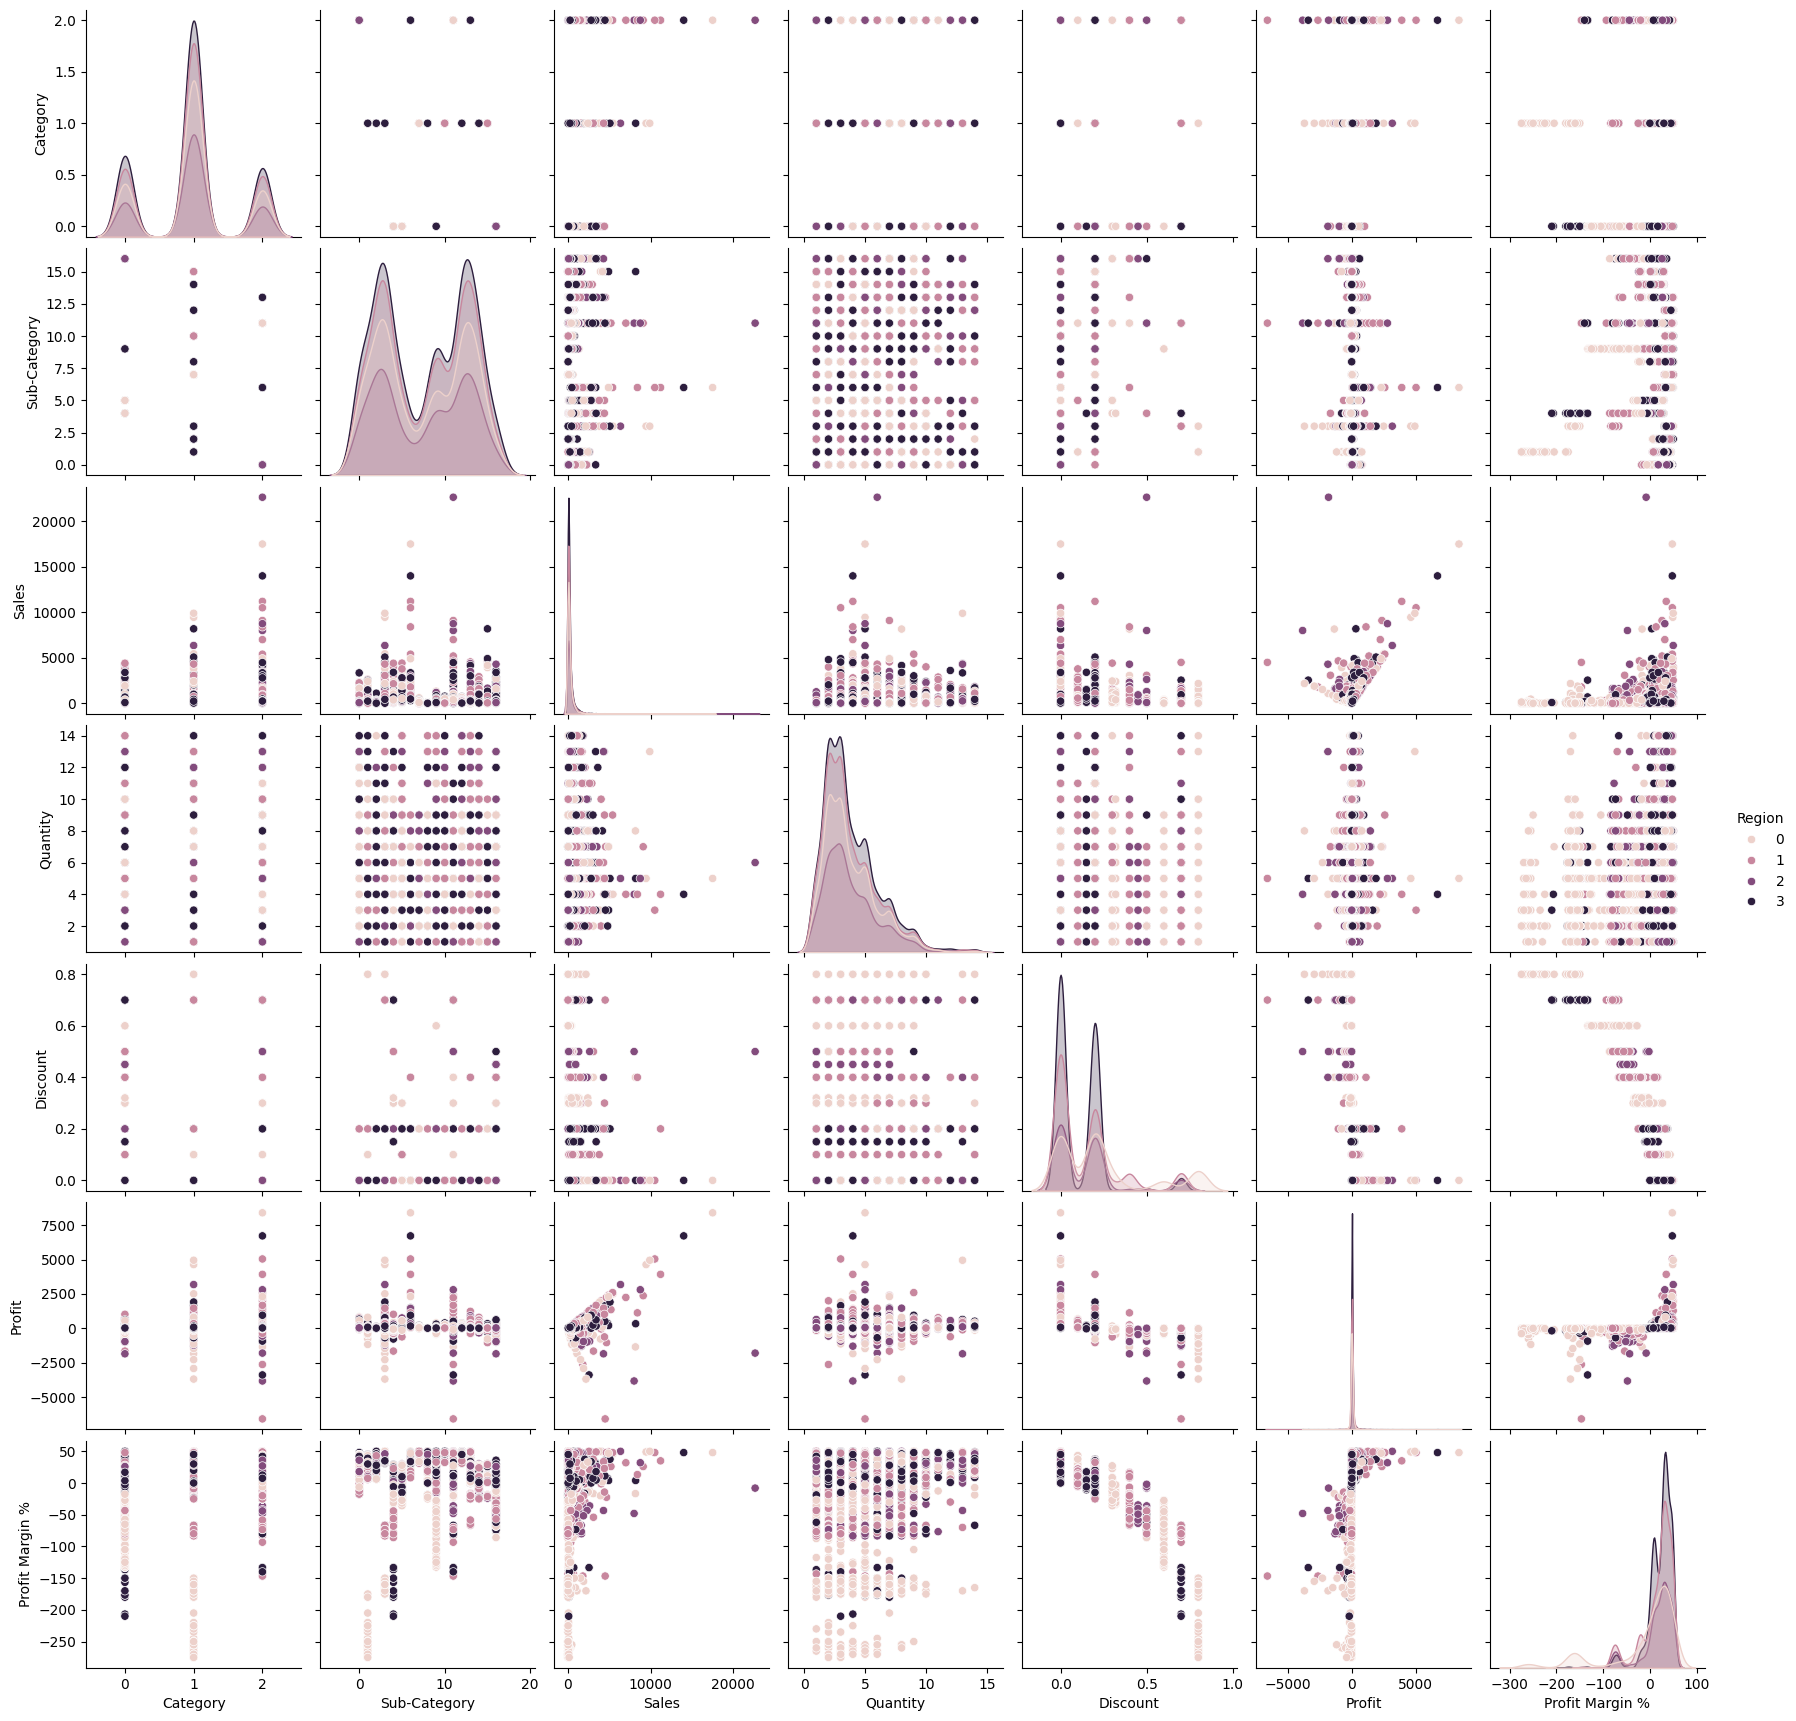

In [ ]:
#Scatteplot using Seaborn to visualiza the specific main features out of 13 features
#'Ship Mode', 'Segment', 'City', 'State','Region', 'Sub-Category','Sales','Quantity', 'Discount', 'Profit', 'Profit Margin %'

#required_cols = ['Category','Sub-Category','Sales','Quantity', 'Discount','Profit', 'Profit Margin %','City', 'State','Region','Ship Mode', 'Segment']
required_cols = ['Region','Category','Sub-Category','Sales','Quantity', 'Discount','Profit', 'Profit Margin %']

# Create Pairplot using Seaborn package
sns.pairplot(data=df2[required_cols], hue='Region')
plt.show()

What we want to focus is the unique count and frequency of the categorical features such as

    There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.
    The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.

While for numerical parameters, it’s interesting to note that the

    75% of orders makes at least 36% profit margin.
    Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.

# Exploratory Data Analysis

# 1. Which Category is Best Selling and Most Profitable?

In [ ]:
# df.groupby(['Category','Sub-Category','Sales','Profit','Quantity']).size()
print(df.groupby(['Category',  'Sales','Profit','Quantity']).sum())

                                                           Ship Mode  \
Category   Sales     Profit     Quantity                               
Furniture  1.892     -0.9933    1                     Standard Class   
           1.988     -1.4413    1                        First Class   
           2.032     -1.3208    1                     Standard Class   
           2.328     -0.7566    2         Standard ClassSecond Class   
           2.784      0.4176    2                       Second Class   
...                                                              ...   
Technology 10499.970  5039.9856 3                     Standard Class   
           11199.968  3919.9888 4                        First Class   
           13999.960  6719.9808 4                        First Class   
           17499.950  8399.9760 5                     Standard Class   
           22638.480 -1811.0784 6                     Standard Class   

                                                    Segment  \


## Best Selling and Most Profitable "Category"
### Category Wise Sales and Profit  

In [ ]:
category_profit = df.groupby(['Category'])[['Sales','Profit']].sum().sort_values(by='Profit', ascending=False)
# Syntax: pd.DataFrame(dfgroupby()[[,,,,]].sum())
print(category_profit )

                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Office Supplies  718735.2440  122364.6608
Furniture        741306.3133   18421.8137


The data provided shows the sales and profit for each category. Here's a summary and interpretation of the results:

    Technology:
        Sales: $836,154.03
        Profit: $145,454.95

    Office Supplies:
        Sales: $718,735.24
        Profit: $122,364.66

    Furniture:
        Sales: $741,306.31
        Profit: $18,421.81
<b>
Summary:

Technology has the highest sales and the highest profit among the three categories, indicating it is the most profitable and generates the most revenue.
Office Supplies has the second highest sales and profit, showing it is also a significant contributor to both revenue and profit.
Furniture has relatively high sales but significantly lower profit compared to the other categories, indicating that despite its substantial sales, it has much lower profitability.</b>

# <b>1. Plotting the Best Profitable Category</b>

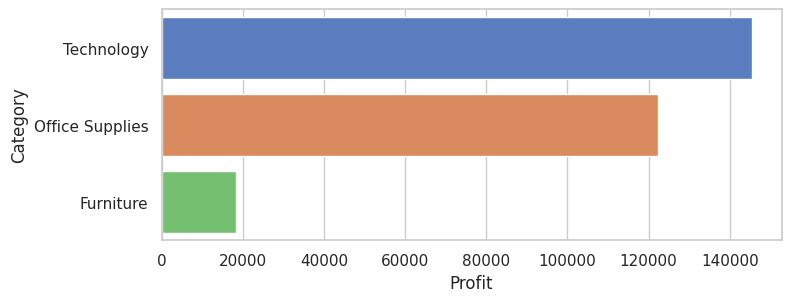

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(data = category_profit, y = category_profit.index, x= category_profit.Profit,  palette = "muted")
plt.title="Best Profitable Category"
plt.show()

## Category Wise Sales, Profit and Quantity of Sales

In [ ]:
category_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum()).sort_values(by='Profit', ascending=False)
print(category_analysis)

                       Sales       Profit  Quantity
Category                                           
Technology       836154.0330  145454.9481      6939
Office Supplies  718735.2440  122364.6608     22861
Furniture        741306.3133   18421.8137      8020


#2. What are the Best  Selling and Most Profitable Sub-Category?

##Sorting by descending order according to "Sales" of "Sub-category"

In [ ]:
#Sorting by descending order according to "Sales" or Sales and Profit
df.groupby(['Sub-Category'])[['Sales','Profit']].sum().sort_values(by=['Sales','Profit'], ascending =False)

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


##Sorting by descending order according to "Profit" of "Sub-category"

In [ ]:
#Sorting by descending order according to Profit
df.groupby(['Sub-Category'])[['Sales','Profit']].sum().sort_values(by=['Profit'], ascending =False)

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


In [ ]:
# Group by sub-category
subcat_analysis = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [ ]:
subcat_profit= pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


# <b>2. Plotting the  Best Selling and Most Profitable "Sub-category" </b>

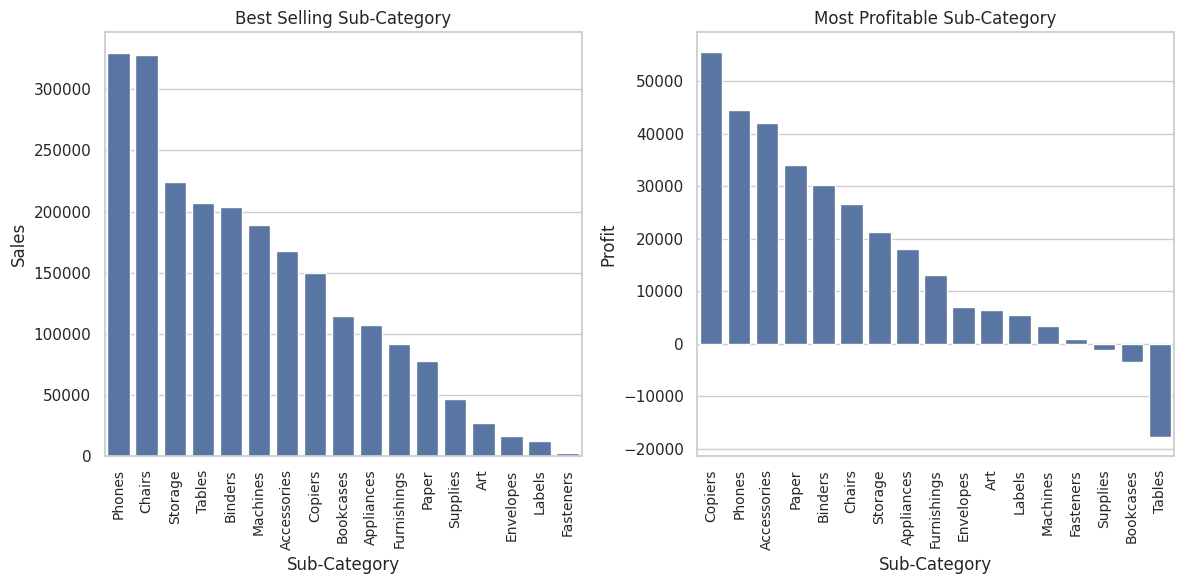

In [ ]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

## Bar plot Analysis
<b>
* Phones and Chairs are Top 2 best selling sub-category.
<br/>
* Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
<br/>
* On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.
</b>

# 3. Which is the Top Selling Sub-Category?

In [ ]:
# df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity', ascending = False)

In [ ]:
subcat_quantity = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


## 3. <b>Plotting the Top Selling Sub-Category as per Quantity</b>

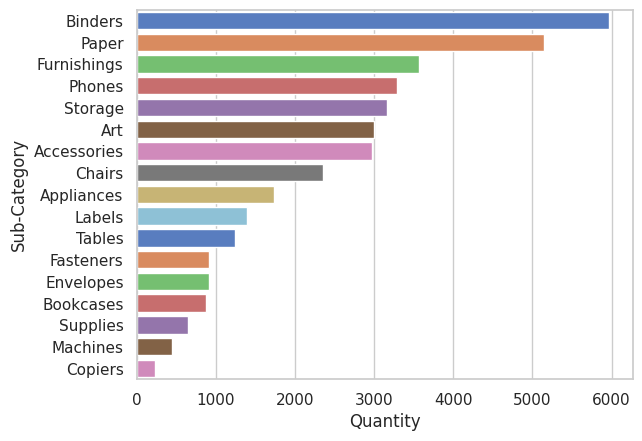

In [ ]:
# Plotting the Bar Plot for Top Selling Sub-Category as per Quantity
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
# plt.figure(figsize=(8,8))
# Plot Bar Plot for Top Selling Sub-Category
sns.barplot(data = subcat_quantity,y = subcat_quantity.index, x = subcat_quantity.Quantity,  palette = "muted")
plt.title="Top Selling Sub-Category as per Quantity"
# plt.xticks(rotation = "vertical", size = 10)
plt.show()

## <b>Analysis:</b>  
* Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.<br/>
* Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.



#Which is the Highly used Segment of the Shipment Mode?

In [ ]:
# There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.
df.groupby(['Ship Mode','Segment']).size().sort_values(ascending=False)

Ship Mode       Segment    
Standard Class  Consumer       3079
                Corporate      1808
                Home Office    1068
Second Class    Consumer       1019
First Class     Consumer        768
Second Class    Corporate       608
First Class     Corporate       485
Same Day        Consumer        317
Second Class    Home Office     316
First Class     Home Office     284
Same Day        Corporate       114
                Home Office     111
dtype: int64

## The dataset provided shows the usage frequencies of different shipment modes across various segments. Here is an interpretation of the results:
<table style="background-color: lightyellow; ">
<tr><td>

<b>Standard Class is the most frequently used shipment mode across all
segments:</b><br/>
Consumer: 3079 shipments<br/>
Corporate: 1808 shipments<br/>
Home Office: 1068 shipments<br/><br/>

<b>Second Class is the second most frequently used shipment mode:</b><br/>
    Consumer: 1019 shipments<br/>
    Corporate: 608 shipments<br/>
    Home Office: 316 shipments<br/><br/>

<b>First Class is the third most frequently used shipment mode:</b><br/>
    Consumer: 768 shipments<br/>
    Corporate: 485 shipments<br/>
    Home Office: 284 shipments<br/><br/>

<b>Same Day is the least used shipment mode:</b><br/>
    Consumer: 317 shipments<br/>
    Corporate: 114 shipments<br/>
    Home Office: 111 shipments<br/><br/>

<b>Summary:</b><br/>

The Consumer segment is the largest user of shipment modes across the board, with the highest numbers in every category of shipment mode.
Standard Class is the most popular shipment mode, particularly within the Consumer segment.<br/>
Second Class and First Class are also popular but used less frequently compared to Standard Class.<br/>
Same Day shipment mode is the least frequently used across all segments, indicating it is the least preferred or possibly the least needed option.
<br/><br/>
In conclusion, if focusing on optimizing shipment strategies, it's clear that Standard Class is the preferred shipment mode, especially for the Consumer segment, followed by Second Class and First Class. The Same Day service, while used, is the least common choice among all segments.
</tr></td>
</table>

#4. Which Customer Segment is Most Profitable?

In [ ]:
df.groupby(['Segment'])['Profit'].sum().sort_values(ascending=False)

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


In [ ]:
# Set the display format for floating-point numbers to avoid scientific notation
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Sales', 'Profit', 'Quantity']].sum()).sort_values('Profit', ascending = False)
segment_analysis

,Sales,Profit,Quantity
Segment,,,
Consumer,"1,160,832.77","134,007.44",19497
Corporate,"706,070.13","91,954.98",11591
Home Office,"429,292.68","60,279.00",6732


# 4. <b> Plotting the Most Profitable Customer Segment </b>

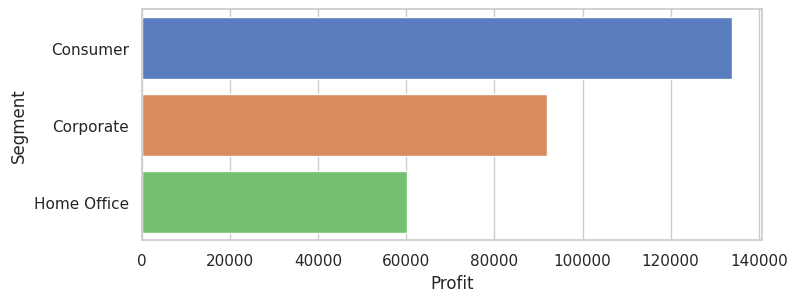

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(data = segment_analysis, y = segment_analysis.index, x= segment_analysis.Profit,  palette = "muted")
plt.title="Most Profitable Customer Segment"
plt.show()

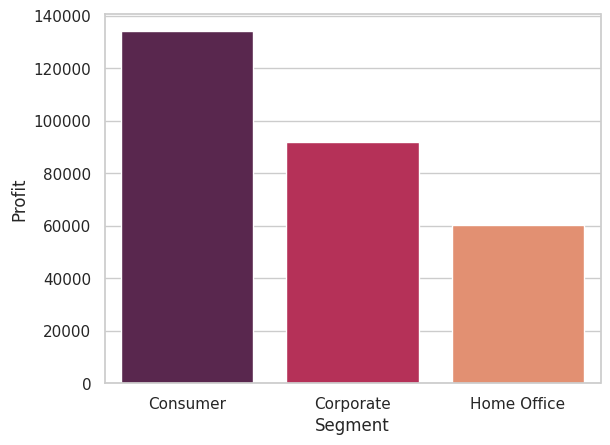

In [ ]:
# plt.figure(figsize=(5,3))
sns.barplot(data = segment_analysis, x = segment_analysis.index, y= segment_analysis.Profit,  palette = "rocket")
plt.title="Customer Segment Profitability"
plt.show()

## <b>Analysis:</b> Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

#5. Which is the Preferred Ship Mode?

In [ ]:
df.groupby(['Ship Mode']).size().sort_values(ascending=False)

,0
Ship Mode,
Standard Class,5955
Second Class,1943
First Class,1537
Same Day,542


# 5. <b> Plotting the Most Preferred Shipment Mode </b>

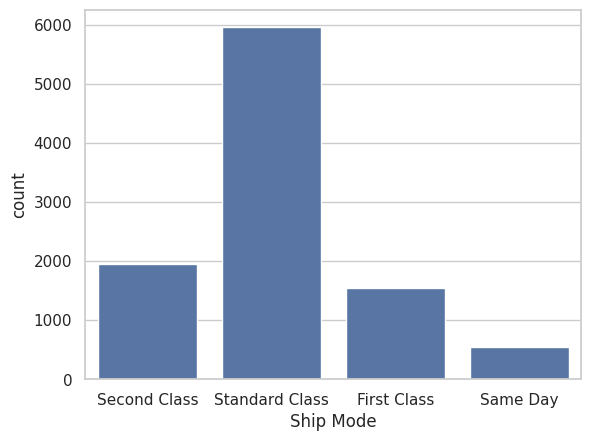

In [ ]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(data = df, x ='Ship Mode' )  #sns.countplot(df['Ship Mode'] )
plt.title ="Preffered Ship Mode"
plt.show()

## <b>Analysis:</b> Seems Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.

#6. Which Region is the Most Profitable?

In [ ]:
df.groupby(['Region'])['Profit'].sum().sort_values(ascending=False)

,Profit
Region,
West,"108,329.81"
East,"91,506.31"
South,"46,749.43"
Central,"39,655.88"


In [ ]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().sort_values(ascending=False) )

# 6. <b> Plotting the Most Profitable Region</b>

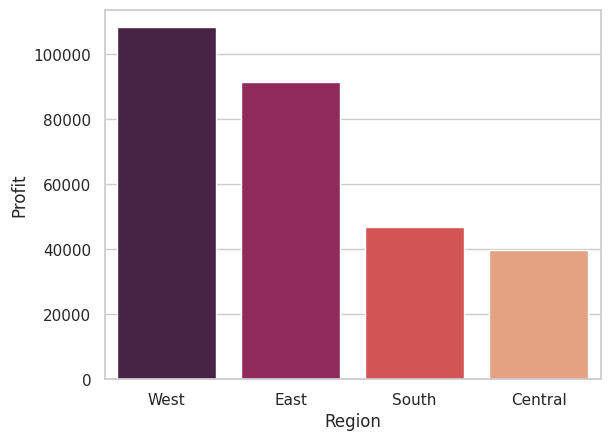

In [ ]:
# Plot shipment mode
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().sort_values(ascending=False) )
# sns.set_theme(style="whitegrid")
sns.barplot(data = region_analysis , x = region_analysis.index , y = region_analysis.Profit , palette='rocket' )
plt.title ="Most Profitable Region"
plt.show()

# <b> Analysis:</b> East and West region are most profitable.

#7. Which City has the Highest Number of Sales?

In [ ]:
city_sales = pd.DataFrame(df.groupby(['City'])['Sales'].sum().sort_values(ascending=False))
city_sales.head(10)


,Sales
City,
New York City,"256,319.04"
Los Angeles,"175,831.90"
Seattle,"119,460.28"
San Francisco,"112,577.17"
Philadelphia,"109,061.46"
Houston,"64,441.26"
Chicago,"48,535.98"
San Diego,"47,521.03"
Jacksonville,"44,713.18"


In [ ]:
top10 = city_sales[-10:]
top10

,Sales
City,
Missouri City,6.37
Keller,6.00
Layton,4.96
Springdale,4.30
San Luis Obispo,3.62
Ormond Beach,2.81
Pensacola,2.21
Jupiter,2.06
Elyria,1.82


In [ ]:
bottom10 = city_sales[-10:]
bottom10

,Sales
City,
Missouri City,6.37
Keller,6.00
Layton,4.96
Springdale,4.30
San Luis Obispo,3.62
Ormond Beach,2.81
Pensacola,2.21
Jupiter,2.06
Elyria,1.82


# 7.1 <b> Plotting the Top 10 City with Highest number of Sales</b>

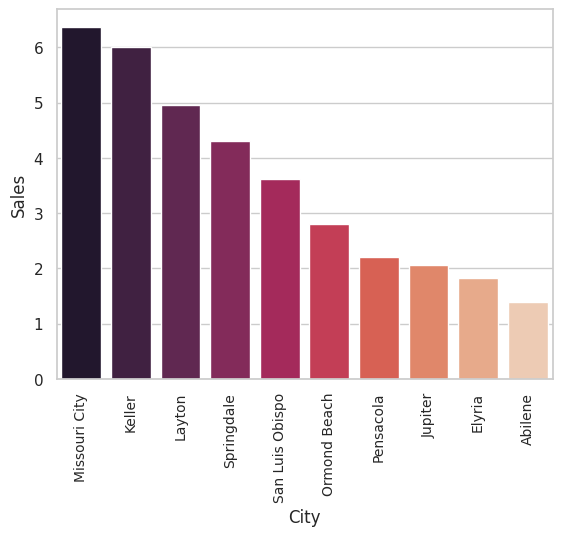

In [ ]:
sns.barplot(data = top10, x = top10.index, y = top10.Sales, palette='rocket')
plt.xticks(rotation = "vertical", size = 10)
plt.title="Top 10 City with Highest Number of Sales"
plt.show()

# 7.2 <b> Plotting the 10 City with Least Sales   </b>

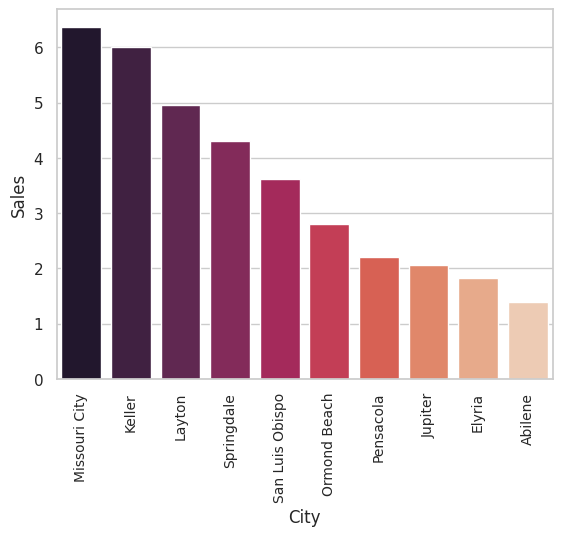

In [ ]:
sns.barplot(data = bottom10, x = bottom10.index, y = bottom10.Sales, palette='rocket')
plt.xticks(rotation = "vertical", size = 10)
plt.title="10 City with Least Number of Sales"
plt.show()

#Analysis: There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

#  8. Which City has Highest Profit? (Additional Query)

In [ ]:
city_profit= pd.DataFrame(df.groupby(['City'])['Profit'].sum().sort_values(ascending=False))
city_profit.head(10)

,Profit
City,
New York City,"62,013.90"
Los Angeles,"30,431.43"
Seattle,"29,121.68"
San Francisco,"17,466.12"
Detroit,"13,146.69"
Lafayette,"10,018.39"
Jackson,"7,581.68"
Atlanta,"6,993.66"
Minneapolis,"6,824.58"


In [ ]:
top10_profit = city_profit[:10]
top10_profit

,Profit
City,
New York City,"62,013.90"
Los Angeles,"30,431.43"
Seattle,"29,121.68"
San Francisco,"17,466.12"
Detroit,"13,146.69"
Lafayette,"10,018.39"
Jackson,"7,581.68"
Atlanta,"6,993.66"
Minneapolis,"6,824.58"


In [ ]:
bottom10_profit = city_profit[-10:]
bottom10_profit

,Profit
City,
Jacksonville,"-2,323.84"
Aurora,"-2,691.74"
Phoenix,"-2,790.88"
Dallas,"-2,846.53"
Burlington,"-3,622.88"
Chicago,"-6,648.33"
Lancaster,"-7,239.07"
San Antonio,"-7,299.05"
Houston,"-10,175.18"


# 8.1 <b> Plotting the Top 10 City with Highest Profit</b>

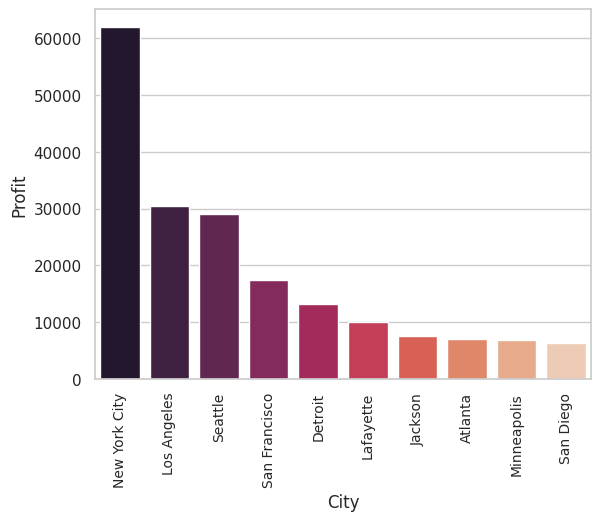

In [ ]:
sns.barplot(data = top10_profit, x = top10_profit.index, y = top10_profit.Profit, palette='rocket')
plt.xticks(rotation = "vertical", size = 10)
plt.title="Top 10 City with Highest Profit"
plt.show()

# 8.2 <b> Plotting the 10 City with Least Profit   </b>

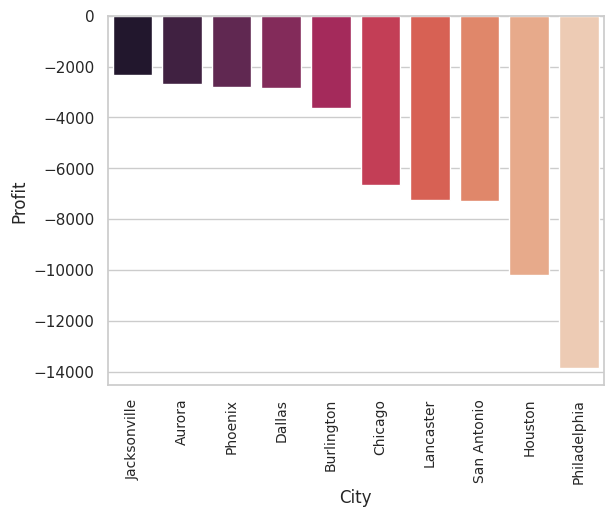

In [ ]:
sns.barplot(data = bottom10_profit, x = bottom10_profit.index, y = bottom10_profit.Profit, palette='rocket')
plt.xticks(rotation = "vertical", size = 10)
plt.title="10 City with Least Profit"
plt.show()

#9. How many "Sub-Category" in each Category? (Additional Query)

In [ ]:
# The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.
df.groupby(['Category','Sub-Category']).size().sort_values(ascending=False)

Category         Sub-Category
Office Supplies  Binders         1522
                 Paper           1359
Furniture        Furnishings      956
Technology       Phones           889
Office Supplies  Storage          846
                 Art              795
Technology       Accessories      775
Furniture        Chairs           615
Office Supplies  Appliances       466
                 Labels           363
Furniture        Tables           319
Office Supplies  Envelopes        254
Furniture        Bookcases        228
Office Supplies  Fasteners        217
                 Supplies         190
Technology       Machines         115
                 Copiers           68
dtype: int64

### The data provided shows the number of items for each sub-category within different categories. Here's an interpretation of the results:
<table style="background-color: lightyellow; ">
<tr><td>

<b>Office Supplies:</b><br/>
Binders: 1522 items (most frequently occurring sub-category in this category)<br/>
Paper: 1359 items<br/>
Storage: 846 items<br/>
Art: 795 items<br/>
Appliances: 466 items<br/>
Labels: 363 items<br/>
Envelopes: 254 items<br/>
Fasteners: 217 items<br/>
Supplies: 190 items<br/><br/>

<b>Furniture:</b><br/>
Furnishings: 956 items (most frequently occurring sub-category in this category)<br/>
Chairs: 615 items<br/>
Tables: 319 items<br/>
Bookcases: 228 items<br/><br/>

<b>Technology:</b><br/>
Phones: 889 items (most frequently occurring sub-category in this category)<br/>
Accessories: 775 items<br/>
Machines: 115 items<br/>
Copiers: 68 items<br/><br/>

<b>Summary:</b><br/>

Office Supplies category has the highest number of items overall, with Binders and Paper being the top sub-categories.
Furniture category has Furnishings as the leading sub-category.
Technology category has Phones as the leading sub-category.
</tr></td>
</table>

In [ ]:
# 75% of orders makes at least 36% profit margin.
# Loss-making orders can go up to 275% losses.
#We must place emphasis on these loss-making sales to cut them off.
print(df.describe())

        Postal Code         Sales     Quantity     Discount      Profit  \
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000   
mean   55154.964117    230.148902     3.790719     0.156278    28.69013   
std    32058.266816    623.721409     2.226657     0.206455   234.45784   
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800   
25%    23223.000000     17.300000     2.000000     0.000000     1.72620   
50%    55901.000000     54.816000     3.000000     0.200000     8.67100   
75%    90008.000000    209.970000     5.000000     0.200000    29.37200   
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600   

       Profit Margin %  
count      9977.000000  
mean         12.011354  
std          46.663769  
min        -275.000000  
25%           7.500000  
50%          27.000000  
75%          36.250000  
max          50.000000  
